<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B4%5D_HHV_cHB_XgBoost_KFold_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude HHV Data ML 111020.csv')
Oil_HHV = data['Bio-crude Oil HHV']
Features = data.drop('Bio-crude Oil HHV', axis = 1)

# Success
print ("Bio-crude HHV dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude HHV dataset has 123 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
30,0.0,0.0,45.5,45.5,0.0,9.1,0.0,39.2
60,0.0,6.5,52.8,0.0,0.0,38.7,1.1,26.2
90,23.6,42.0,0.0,0.0,5.9,0.0,26.4,34.5
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5


In [4]:
# TODO: Minimum price of the data
minimum_Oil_HHV = np.min(Oil_HHV)

# TODO: Maximum price of the data
maximum_Oil_HHV = np.max(Oil_HHV)

# TODO: Mean price of the data
mean_Oil_HHV = np.mean(Oil_HHV)

# TODO: Median price of the data
median_Oil_HHV = np.median(Oil_HHV)

# TODO: Standard deviation of prices of the data
std_Oil_HHV = np.std(Oil_HHV)

# Show the calculated statistics

print("Statistics for bio-crude HHV dataset:\n")
print("Minimum bio-crude oil HHV:{: .2f} MJ/kg".format(minimum_Oil_HHV))
print("Maximum bio-crude oil HHV:{: .2f} MJ/kg".format(maximum_Oil_HHV))
print("Mean bio-crude oil HHV:{: .2f} MJ/kg".format(mean_Oil_HHV))
print("Median bio-crude oil HHV:{: .2f} MJ/kg".format(median_Oil_HHV))
print("Standard deviation of bio-crude oil HHV:{: .2f} MJ/kg".format(std_Oil_HHV))

data.describe()

Statistics for bio-crude HHV dataset:

Minimum bio-crude oil HHV: 17.70 MJ/kg
Maximum bio-crude oil HHV: 44.40 MJ/kg
Mean bio-crude oil HHV: 33.22 MJ/kg
Median bio-crude oil HHV: 34.00 MJ/kg
Standard deviation of bio-crude oil HHV: 5.09 MJ/kg


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,8.754472,24.526016,20.039837,8.446341,18.629268,8.554472,7.239024,33.221138
std,16.802543,26.330998,27.646648,16.922036,25.908710,14.504868,11.343089,5.108098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.700000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.250000
50%,1.700000,17.600000,1.000000,0.000000,9.000000,0.000000,3.000000,34.000000
75%,11.050000,44.050000,39.600000,9.200000,25.850000,14.300000,7.500000,36.550000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,44.400000


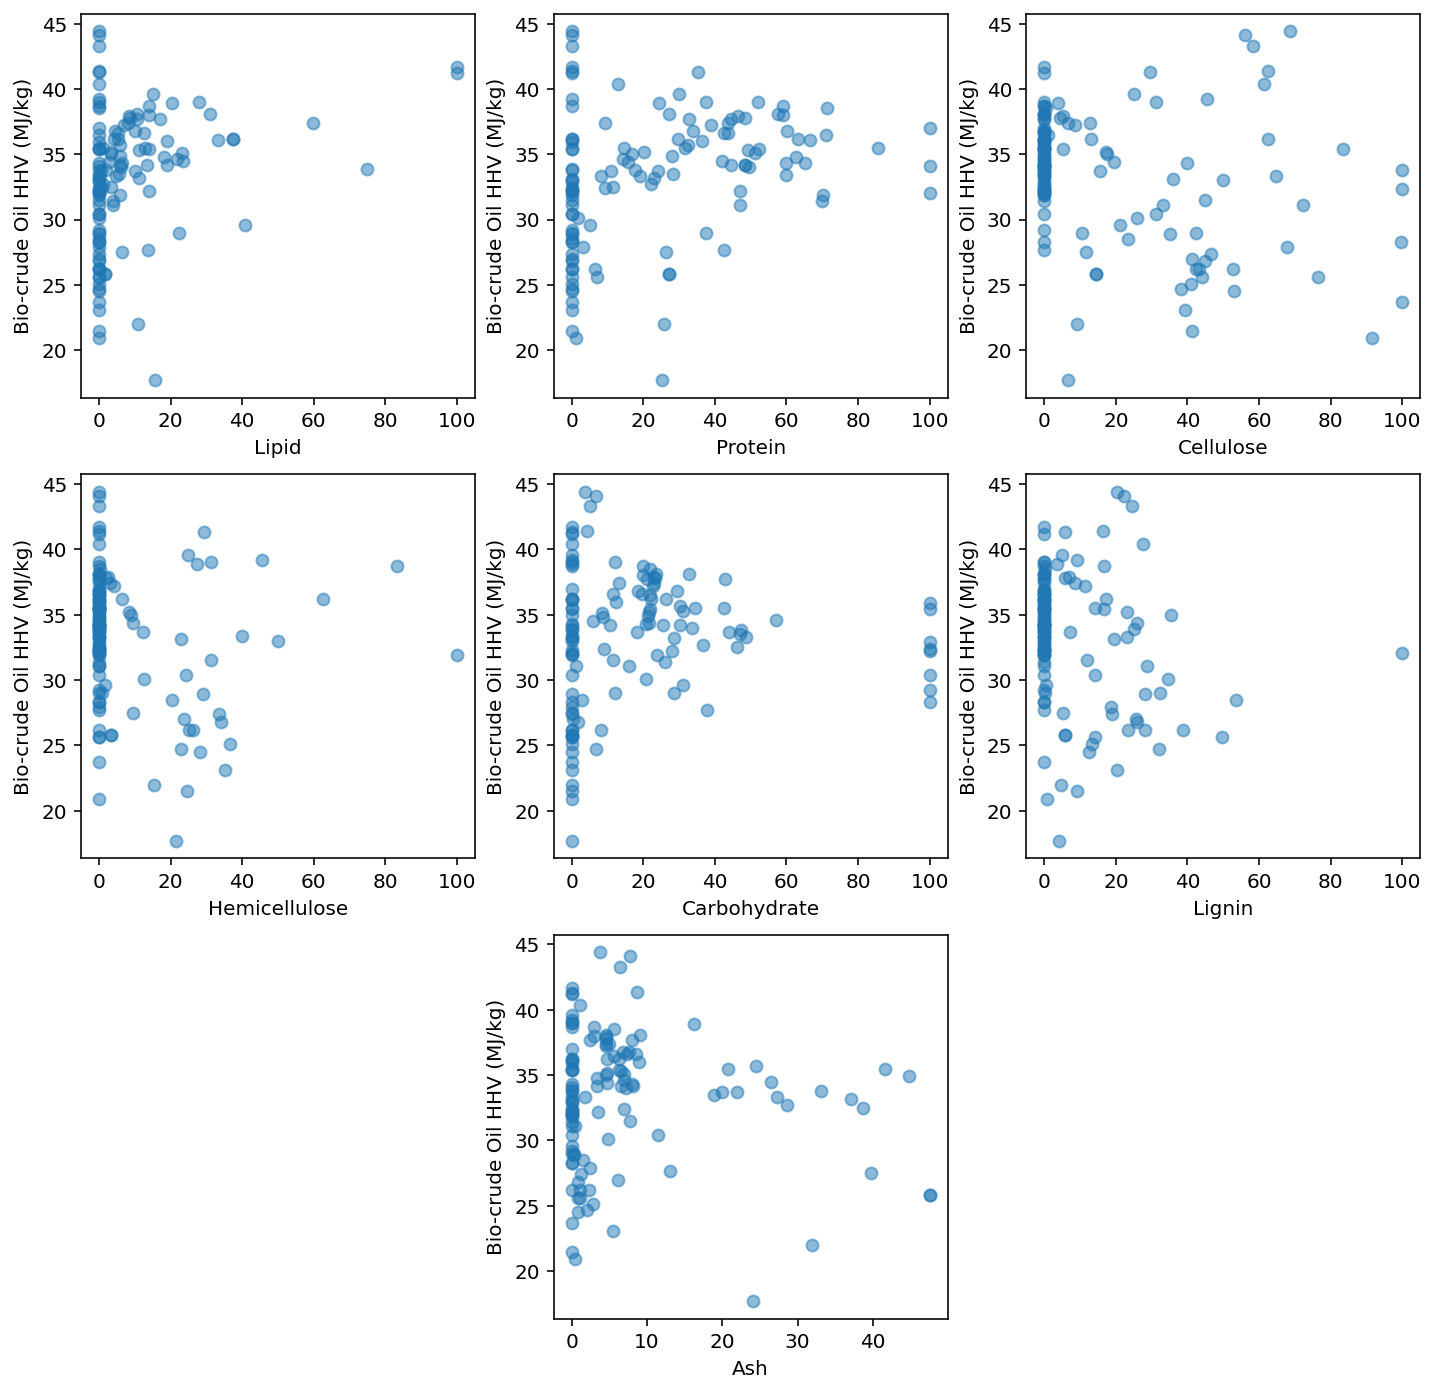

In [5]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lipid'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Protein'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lignin'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Ash'],data['Bio-crude Oil HHV'],alpha = 0.5)
plt.show()

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 5., 0.,
        2., 3., 3., 2., 3., 1., 3., 0., 4., 4., 6., 4., 7., 8., 5., 6., 7.,
        7., 5., 4., 4., 4., 5., 1., 1., 1., 0., 4., 0., 0., 1., 0., 2.]),
 array([17.7  , 18.234, 18.768, 19.302, 19.836, 20.37 , 20.904, 21.438,
        21.972, 22.506, 23.04 , 23.574, 24.108, 24.642, 25.176, 25.71 ,
        26.244, 26.778, 27.312, 27.846, 28.38 , 28.914, 29.448, 29.982,
        30.516, 31.05 , 31.584, 32.118, 32.652, 33.186, 33.72 , 34.254,
        34.788, 35.322, 35.856, 36.39 , 36.924, 37.458, 37.992, 38.526,
        39.06 , 39.594, 40.128, 40.662, 41.196, 41.73 , 42.264, 42.798,
        43.332, 43.866, 44.4  ]),
 <a list of 50 Patch objects>)

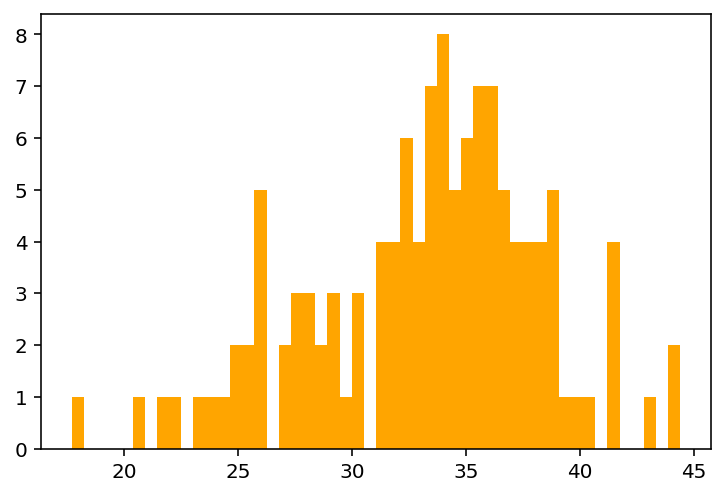

In [6]:
plt.hist(data['Bio-crude Oil HHV'],bins=50,color='orange')

(array([63.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

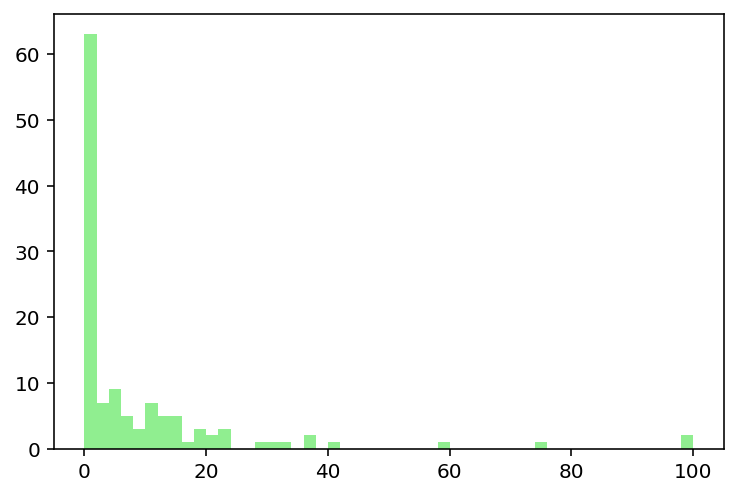

In [7]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


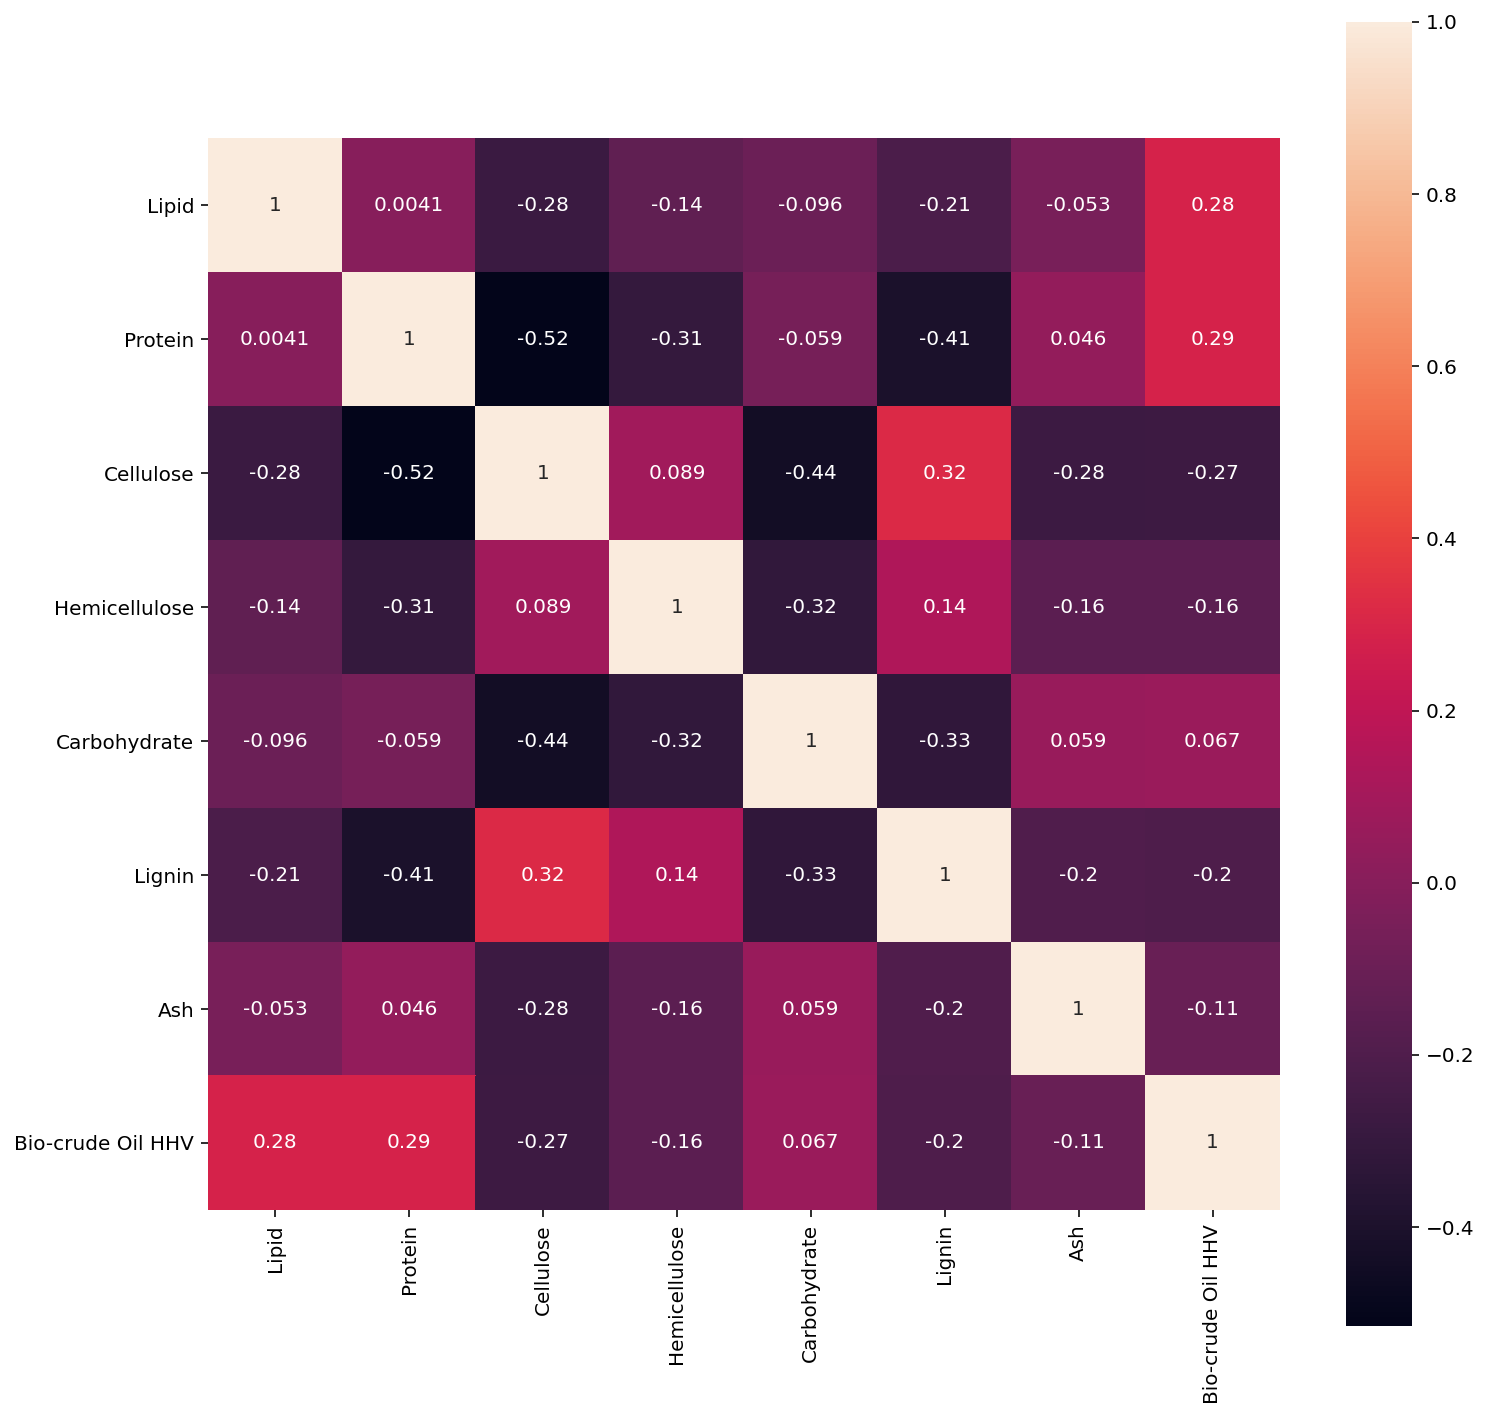

In [8]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [9]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [25]:
for i in range(0,201,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = i)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.9389268192480406
Standard deviation of R2 of training set 0.00942431213020984
Mean value of R2 of test set 0.21759188670172605
Standard deviation of R2 of test set 0.10721924725931778
1
Mean value of R2 of training set 0.9308551414530822
Standard deviation of R2 of training set 0.009963412797728836
Mean value of R2 of test set 0.08473340480328966
Standard deviation of R2 of test set 0.12621905413776993
2
Mean value of R2 of training set 0.9279329581690874
Standard deviation of R2 of training set 0.006638649257668183
Mean value of R2 of test set 0.03636416773716559
Standard deviation of R2 of test set 0.08147246475702857
3
Mean value of R2 of training set 0.9375560264066835
Standard deviation of R2 of training set 0.007749774301738592
Mean value of R2 of test set -0.09033719989911786
Standard deviation of R2 of test set 0.35862318206375055
4
Mean value of R2 of training set 0.9342625389118874
Standard deviation of R2 of training set 0.001869797049336

In [26]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 0.9556744350650445
Standard deviation of MAE of training set 0.0241816542931173
Mean value of MAE of test set 2.8956752653044417
Standard deviation of MAE of test set 0.29834376118301587

Mean value of RMSE of training set 1.3461100492595583
Standard deviation of RMSE of training set 0.015218046986564527
Mean value of RMSE of test set 3.84541226462652
Standard deviation of RMSE of test set 0.39403210845134806

Mean value of R2 of training set 0.9291601663202496
Standard deviation of R2 of training set 0.0074256961573116445
Mean value of R2 of test set 0.412715720632895
Standard deviation of R2 of test set 0.08110623051370933

Mean value of MRE of training set 0.028765834974209103
Standard deviation of MRE of training set 0.0006390154963382595
Mean value of MRE of test set 0.08727277733875925
Standard deviation of MRE of test set 0.009987091199951923


Text(0.5, 1.0, 'y_pred vs. y_true')

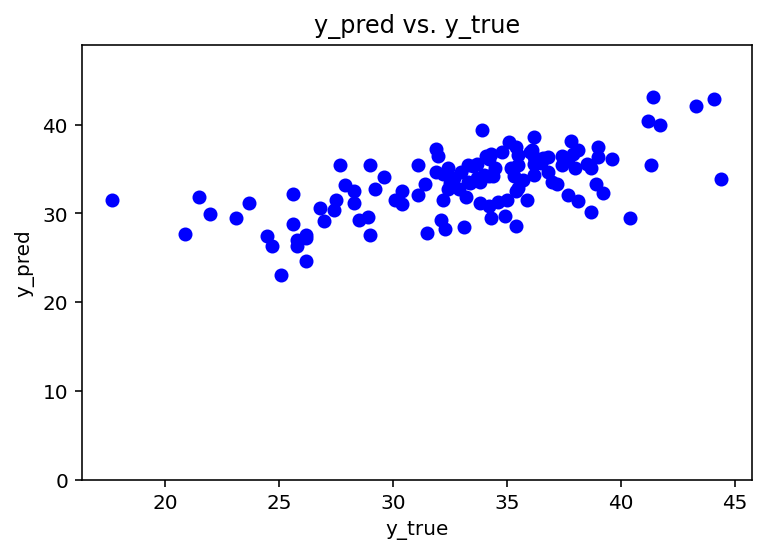

In [32]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_XGBoost.csv', index = False, header=True)

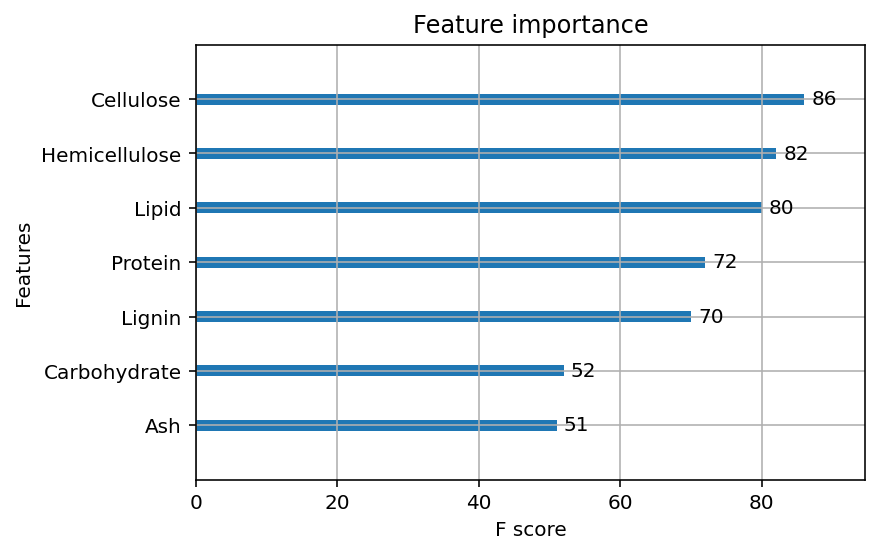

In [33]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'n_estimators': np.linspace(10, 110, 11, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 40}
最佳模型得分: 0.6927361093234188


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.4s finished


In [36]:
# n_estimators 参数的最佳取值(10, 220, 10)

for i in range(71, 89, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': i, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

71
Mean value of R2 of training set 0.940170073705081
Standard deviation of R2 of training set 0.012124954145299018
Mean value of R2 of test set 0.38146018802969245
Standard deviation of R2 of test set 0.08696918583491929
72
Mean value of R2 of training set 0.9409884904096065
Standard deviation of R2 of training set 0.012231805078319839
Mean value of R2 of test set 0.38186732318970346
Standard deviation of R2 of test set 0.0855231265115943
73
Mean value of R2 of training set 0.9418601290303981
Standard deviation of R2 of training set 0.011465432180258677
Mean value of R2 of test set 0.38330857462614426
Standard deviation of R2 of test set 0.08700068341079355
74
Mean value of R2 of training set 0.942986081513486
Standard deviation of R2 of training set 0.01097309074110149
Mean value of R2 of test set 0.38335780168850536
Standard deviation of R2 of test set 0.08704910598984451
75
Mean value of R2 of training set 0.9435372903942919
Standard deviation of R2 of training set 0.01107510184276

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'max_depth': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'max_depth': 5}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [37]:
# max_depth 参数的最佳取值(1, 10, 10)

for i in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': i, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.4981954554393588
Standard deviation of R2 of training set 0.030704162350800715
Mean value of R2 of test set 0.2547620237822616
Standard deviation of R2 of test set 0.09224307722944737
2
Mean value of R2 of training set 0.7992723846114345
Standard deviation of R2 of training set 0.006422789105311629
Mean value of R2 of test set 0.39891169851175
Standard deviation of R2 of test set 0.11450221229540226
3
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
4
Mean value of R2 of training set 0.9295402835317442
Standard deviation of R2 of training set 0.009785426593353196
Mean value of R2 of test set 0.41886039272785025
Standard deviation of R2 of test set 0.06677408406362537
5
Mean value of R2 of training set 0.9450315892914946
Standard deviation of R2 of training set 0.011079870410457151
M

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'min_child_weight': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'min_child_weight': 1}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [42]:
# min_child_weight 参数的最佳取值(1, 10, 10)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': i/10,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.1
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.2
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.3
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.4
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'gamma': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'gamma': 0.0}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [43]:
# gamma 参数的最佳取值(0, 0.1, 11)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': i/100, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.01
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.02
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.03
Mean value of R2 of training set 0.8919025716246124
Standard deviation of R2 of training set 0.005650999507076404
Mean value of R2 of test set 0.4196491982204756
Standard deviation of R2 of test set 0.07288218588980572
0.04
Mean value of R2 of training set 0.8919312735386401
Standard deviation of R2 of training set 0.00566

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'subsample': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'subsample': 0.6000000000000001}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [46]:
# subsample 参数的最佳取值(0, 1, 11)

for i in range(831,849,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': i/1000, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/1000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.831
Mean value of R2 of training set 0.9085296600218603
Standard deviation of R2 of training set 0.00741811422219243
Mean value of R2 of test set 0.4350356094526058
Standard deviation of R2 of test set 0.10087447020306961
0.832
Mean value of R2 of training set 0.911112081017463
Standard deviation of R2 of training set 0.008575361069033541
Mean value of R2 of test set 0.44659564822238923
Standard deviation of R2 of test set 0.10092652565580382
0.833
Mean value of R2 of training set 0.9112284587219036
Standard deviation of R2 of training set 0.00879588941477461
Mean value of R2 of test set 0.44565636205924647
Standard deviation of R2 of test set 0.09989774401221344
0.834
Mean value of R2 of training set 0.9109540507504085
Standard deviation of R2 of training set 0.008363945993953452
Mean value of R2 of test set 0.4451067677863498
Standard deviation of R2 of test set 0.08325047126366701
0.835
Mean value of R2 of training set 0.9105872434762423
Standard deviation of R2 of training set 0.

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'colsample_bytree': np.linspace(0, 1, 11)[1:]}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'colsample_bytree': 1.0}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [50]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': i/100, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.7989373677190125
Standard deviation of R2 of training set 0.007790204450435617
Mean value of R2 of test set 0.26652688785332634
Standard deviation of R2 of test set 0.052448581089070884
0.01
Mean value of R2 of training set 0.7989373677190125
Standard deviation of R2 of training set 0.007790204450435617
Mean value of R2 of test set 0.26652688785332634
Standard deviation of R2 of test set 0.052448581089070884
0.02
Mean value of R2 of training set 0.7989373677190125
Standard deviation of R2 of training set 0.007790204450435617
Mean value of R2 of test set 0.26652688785332634
Standard deviation of R2 of test set 0.052448581089070884
0.03
Mean value of R2 of training set 0.7989373677190125
Standard deviation of R2 of training set 0.007790204450435617
Mean value of R2 of test set 0.26652688785332634
Standard deviation of R2 of test set 0.052448581089070884
0.04
Mean value of R2 of training set 0.7989373677190125
Standard deviation of R2 of training set

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_lambda': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 0.7000000000000001}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [53]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for i in range(0,20,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': i/1000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/1000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9355574074830734
Standard deviation of R2 of training set 0.008961249875078939
Mean value of R2 of test set 0.48148652260769764
Standard deviation of R2 of test set 0.07930942841413363
0.001
Mean value of R2 of training set 0.9355827416992817
Standard deviation of R2 of training set 0.00811001943578201
Mean value of R2 of test set 0.4756154487807418
Standard deviation of R2 of test set 0.07153252746511772
0.002
Mean value of R2 of training set 0.9358671537328078
Standard deviation of R2 of training set 0.007812370029157012
Mean value of R2 of test set 0.4754343981185612
Standard deviation of R2 of test set 0.07501266369085985
0.003
Mean value of R2 of training set 0.9373495948068413
Standard deviation of R2 of training set 0.00819292644472208
Mean value of R2 of test set 0.47568517160890167
Standard deviation of R2 of test set 0.07443918059790877
0.004
Mean value of R2 of training set 0.9367847707456533
Standard deviation of R2 of training set 0.0

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_alpha': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_alpha': 0.0}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.8s finished


In [55]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for i in range(0,100,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': 0.01, 'reg_alpha': i/10000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9365260955734044
Standard deviation of R2 of training set 0.009375860496450061
Mean value of R2 of test set 0.4854683192238392
Standard deviation of R2 of test set 0.06743140610125672
0.0001
Mean value of R2 of training set 0.9365249756249954
Standard deviation of R2 of training set 0.009375902727553197
Mean value of R2 of test set 0.4854687676769546
Standard deviation of R2 of test set 0.06743154512552613
0.0002
Mean value of R2 of training set 0.9365239079191702
Standard deviation of R2 of training set 0.009375850729164968
Mean value of R2 of test set 0.4854689608399739
Standard deviation of R2 of test set 0.06743183639535304
0.0003
Mean value of R2 of training set 0.9365228706469511
Standard deviation of R2 of training set 0.009375848374821057
Mean value of R2 of test set 0.48546939811214534
Standard deviation of R2 of test set 0.06743224142831639
0.0004
Mean value of R2 of training set 0.9365249426972372
Standard deviation of R2 of training se

In [ ]:
# No use now.
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'eta': np.logspace(-2, 0, 10)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'eta': 0.01}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [56]:
# eta 参数的最佳取值(-2, 0, 10)

for i in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': i/100, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': 0.01, 'reg_alpha': 0.0006,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9365228924737313
Standard deviation of R2 of training set 0.009374173792081627
Mean value of R2 of test set 0.48547821470631897
Standard deviation of R2 of test set 0.06744049312851222
0.01
Mean value of R2 of training set 0.9365228924737313
Standard deviation of R2 of training set 0.009374173792081627
Mean value of R2 of test set 0.48547821470631897
Standard deviation of R2 of test set 0.06744049312851222
0.02
Mean value of R2 of training set 0.9365228924737313
Standard deviation of R2 of training set 0.009374173792081627
Mean value of R2 of test set 0.48547821470631897
Standard deviation of R2 of test set 0.06744049312851222
0.03
Mean value of R2 of training set 0.9365228924737313
Standard deviation of R2 of training set 0.009374173792081627
Mean value of R2 of test set 0.48547821470631897
Standard deviation of R2 of test set 0.06744049312851222
0.04
Mean value of R2 of training set 0.9365228924737313
Standard deviation of R2 of training set 0.0

In [57]:
# seed 参数的最佳取值(0, 100, 1)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': 0.01, 'reg_alpha': 0.0006,
                'seed': i}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.934370487632752
Standard deviation of R2 of training set 0.008959526060464853
Mean value of R2 of test set 0.45136285724967434
Standard deviation of R2 of test set 0.07408274880893606
1
Mean value of R2 of training set 0.9325070999972865
Standard deviation of R2 of training set 0.0064729424311946275
Mean value of R2 of test set 0.4124421728628518
Standard deviation of R2 of test set 0.07104864140487388
2
Mean value of R2 of training set 0.9311537961916275
Standard deviation of R2 of training set 0.007461507702094266
Mean value of R2 of test set 0.4607483423741751
Standard deviation of R2 of test set 0.09757058393037721
3
Mean value of R2 of training set 0.9329771027971846
Standard deviation of R2 of training set 0.00574023069345344
Mean value of R2 of test set 0.4320592899619175
Standard deviation of R2 of test set 0.0833627191890593
4
Mean value of R2 of training set 0.9346548693638811
Standard deviation of R2 of training set 0.005072708316954544
M

[05:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal model has RMSE of training set: 4.794023577965594
Optimal model has RMSE of test set: 7.632683974683252
Optimal model has R2 score of training set 0.91 on test data.
Optimal model has R2 score of test set 0.85 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 34.91 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 39.48 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 31.81 wt%


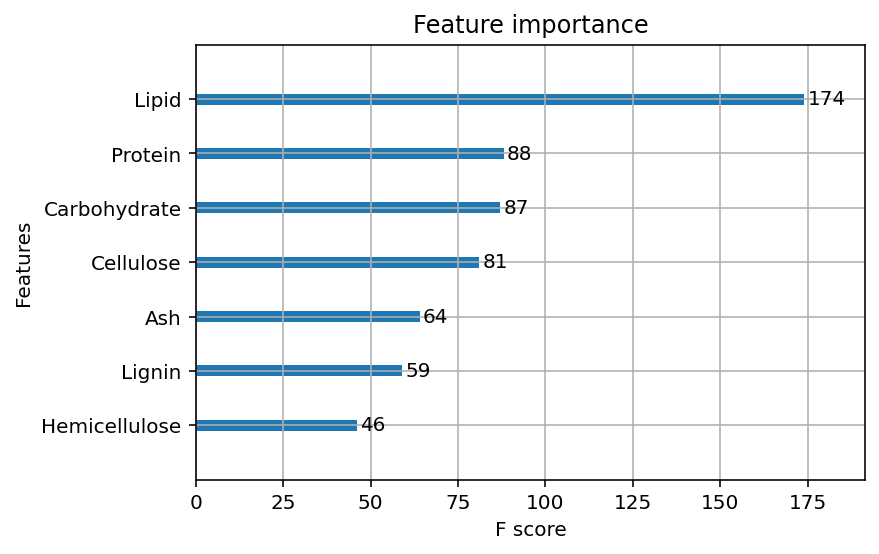

In [ ]:
# No use now.
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
other_params = {'eta': 0.01, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

model = XGBRegressor(**other_params,silent = True)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [{'Lipid':21.9, 'Protein':17.8, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':58.9, 'Lignin':0, 'Ash':1.1}, # Model Food Waste
                              {'Lipid':19.7, 'Protein':13.5, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':22.9, 'Lignin':0, 'Ash':7.3},  # N.salina
                              {'Lipid':5.5, 'Protein':45.3, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':14.5, 'Lignin':0, 'Ash':10.4}]  # G.sulphuraria

feedstock_composition_data = pd.DataFrame(feedstock_composition_data)

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [58]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 77, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.84, 'reg_lambda': 0.01, 'reg_alpha': 0.0006,
                'seed': 10}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 0.9786982559576266
Standard deviation of MAE of training set 0.04249488203779677
Mean value of MAE of test set 2.7810766421682467
Standard deviation of MAE of test set 0.35553837062531957

Mean value of RMSE of training set 1.3412352247463655
Standard deviation of RMSE of training set 0.06205106899124164
Mean value of RMSE of test set 3.6137427816761183
Standard deviation of RMSE of test set 0.5778080302863744

Mean value of R2 of training set 0.9300896110530382
Standard deviation of R2 of training set 0.003638803464897087
Mean value of R2 of test set 0.4867414480913901
Standard deviation of R2 of test set 0.08716158669520763

Mean value of MRE of training set 0.02946703132318221
Standard deviation of MRE of training set 0.0014029764649953363
Mean value of MRE of test set 0.08388140146245547
Standard deviation of MRE of test set 0.011942081757663174


In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

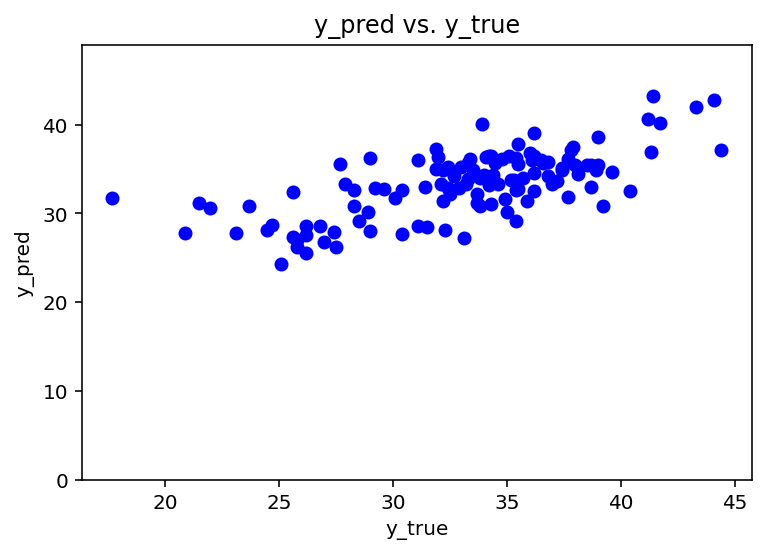

In [59]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

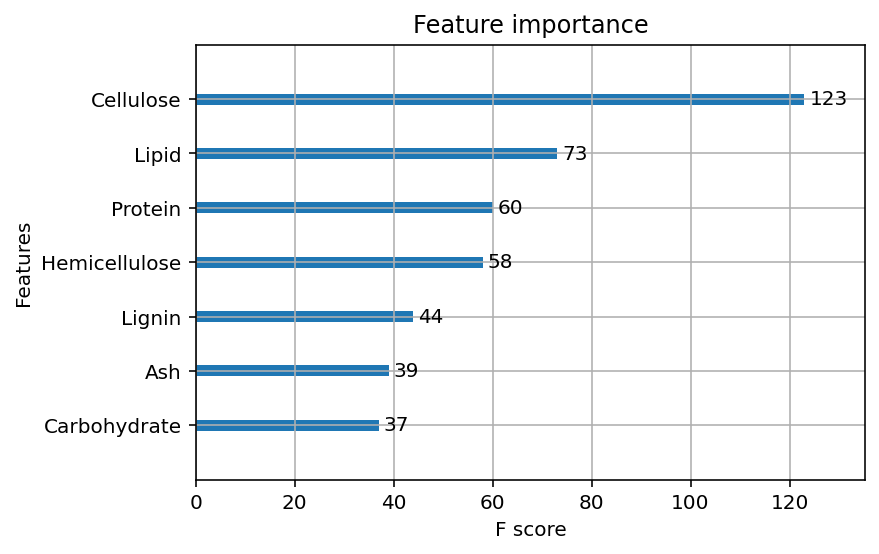

In [60]:
plot_importance(model)
plt.show()